## Анализ главных компонент (principal component analysis). Факторный анализ.  
Это метод понижения размерности данных. Идея метода заключается в том,  
чтобы некоторые переменные сгруппировать в факторы, при этом потеряв наименьшее количество информации.  
Фактор - это некоторая латентная переменная, которая объединяет исходные переменные в данных.

### Задача
Построить главные компоненты для датасета Ирис.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris_data = load_iris()
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
X = df['petal length (cm)'].values
Y = df['petal width (cm)'].values
data = df[['petal length (cm)', 'petal width (cm)']].values

Построим главную компоненту 1 для взаимовсязанных переменных длины внутренней доли околоцветника (petal length)  
и ширины внутренней доли околоцветника (petal width).

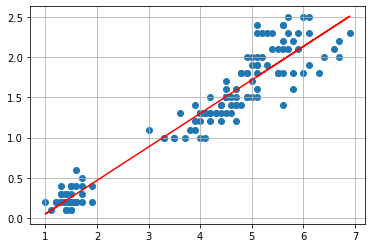

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(X, Y)

b1, b0 = np.polyfit(X, Y, 1)
plt.plot(X, b0+b1*X, color='red')

plt.grid()
plt.show()

Построим диаграмму значимости главных компонент Scree plot.  
На ней отображается процент дисперсии, который объясняется каждой главной компонентой. 

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [2] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


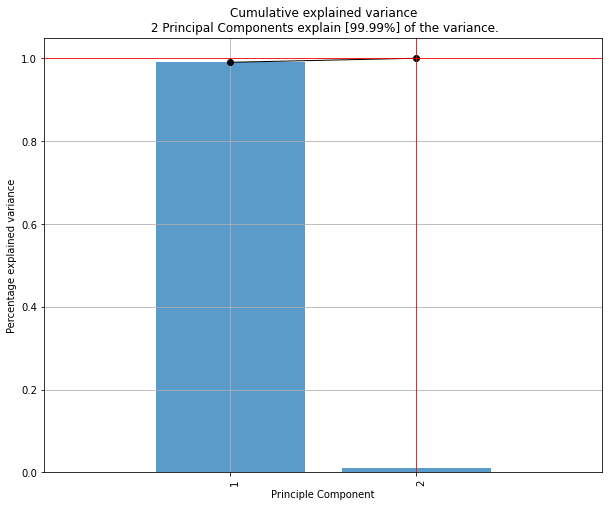

<Figure size 432x288 with 0 Axes>

In [3]:
from pca import pca

model = pca(n_components=2)
results = model.fit_transform(data)

model.plot()
plt.show()

Построим график Biplot, на котором все наблюдения отображаются в новом пространстве,  
где на оси X отложены значения главной компоненты 1, а по оси Y - главной компоненты 2.

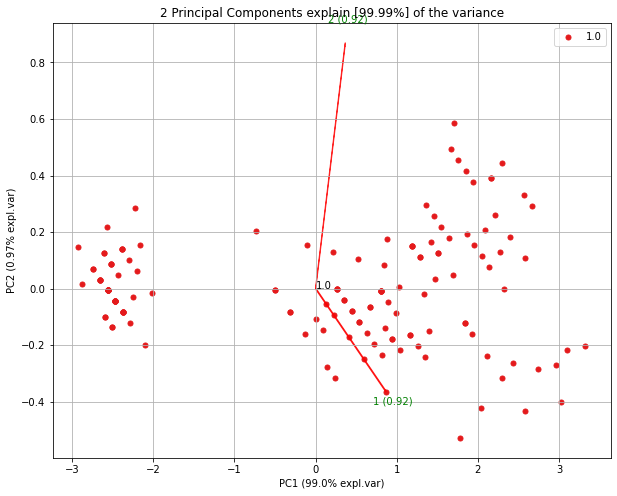

In [4]:
model.biplot(n_feat=4)
plt.show()

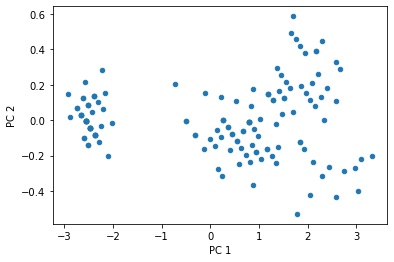

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='auto')
pca_results = pca.fit_transform(data)
pca_df = pd.DataFrame(data = pca_results, columns = ['PC 1', 'PC 2'])

pca_df.plot.scatter(x='PC 1', y='PC 2')
plt.show()


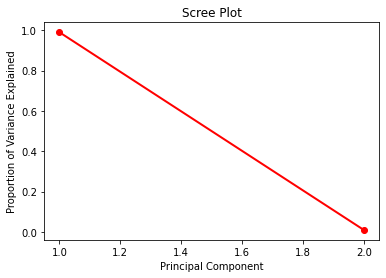

In [6]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Построим график Biplot, для всех переменных датасета Ирис.

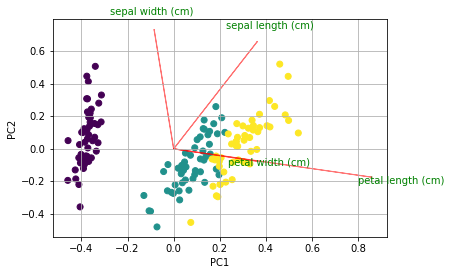

In [7]:
from sklearn.preprocessing import StandardScaler

X = iris_data.data
y = iris_data.target

pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs*scalex, ys*scaley, c=y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, iris_data.feature_names[i], color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid()

myplot(x_new[:, 0:2], np.transpose(pca.components_[0:2, :]))
plt.show()